## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9719015	total: 57.7ms	remaining: 57.6s
1:	learn: 0.9522483	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9331857	total: 59.9ms	remaining: 19.9s
3:	learn: 0.9174004	total: 60.7ms	remaining: 15.1s
4:	learn: 0.9006634	total: 61.8ms	remaining: 12.3s
5:	learn: 0.8873324	total: 62.7ms	remaining: 10.4s
6:	learn: 0.8708736	total: 63.8ms	remaining: 9.04s
7:	learn: 0.8554690	total: 64.7ms	remaining: 8.02s
8:	learn: 0.8409336	total: 65.5ms	remaining: 7.22s
9:	learn: 0.8251839	total: 66.4ms	remaining: 6.57s
10:	learn: 0.8120085	total: 67.3ms	remaining: 6.05s
11:	learn: 0.7973329	total: 68.1ms	remaining: 5.61s
12:	learn: 0.7829160	total: 69.4ms	remaining: 5.27s
13:	learn: 0.7683930	total: 70.6ms	remaining: 4.97s
14:	learn: 0.7560133	total: 71.8ms	remaining: 4.71s
15:	learn: 0.7430075	total: 73.1ms	remaining: 4.49s
16:	learn: 0.7322459	total: 74.2ms	remaining: 4.29s
17:	learn: 0.7213931	total: 75.1ms	remaining: 4.09s
18:	learn: 0.7092126	total: 75.9ms	remaining

36:	learn: 0.5507013	total: 96.6ms	remaining: 2.52s
37:	learn: 0.5436418	total: 97.7ms	remaining: 2.47s
38:	learn: 0.5361302	total: 99ms	remaining: 2.44s
39:	learn: 0.5292399	total: 100ms	remaining: 2.4s
40:	learn: 0.5231031	total: 101ms	remaining: 2.37s
41:	learn: 0.5163922	total: 102ms	remaining: 2.33s
42:	learn: 0.5109330	total: 103ms	remaining: 2.3s
43:	learn: 0.5050588	total: 105ms	remaining: 2.27s
44:	learn: 0.4977018	total: 105ms	remaining: 2.24s


45:	learn: 0.4913992	total: 107ms	remaining: 2.22s
46:	learn: 0.4860270	total: 108ms	remaining: 2.19s
47:	learn: 0.4803619	total: 109ms	remaining: 2.16s
48:	learn: 0.4753400	total: 110ms	remaining: 2.13s
49:	learn: 0.4703647	total: 111ms	remaining: 2.1s
50:	learn: 0.4640531	total: 112ms	remaining: 2.08s
51:	learn: 0.4590661	total: 112ms	remaining: 2.05s
52:	learn: 0.4533155	total: 113ms	remaining: 2.02s
53:	learn: 0.4500690	total: 114ms	remaining: 2s
54:	learn: 0.4459143	total: 115ms	remaining: 1.97s
55:	learn: 0.4426567	total: 116ms	remaining: 1.95s
56:	learn: 0.4388098	total: 117ms	remaining: 1.93s
57:	learn: 0.4345224	total: 118ms	remaining: 1.91s
58:	learn: 0.4311808	total: 118ms	remaining: 1.89s
59:	learn: 0.4273366	total: 120ms	remaining: 1.87s
60:	learn: 0.4233931	total: 120ms	remaining: 1.85s
61:	learn: 0.4186786	total: 121ms	remaining: 1.83s
62:	learn: 0.4162692	total: 122ms	remaining: 1.81s
63:	learn: 0.4120486	total: 123ms	remaining: 1.8s
64:	learn: 0.4084386	total: 124ms	re

173:	learn: 0.2454549	total: 219ms	remaining: 1.04s
174:	learn: 0.2448898	total: 220ms	remaining: 1.04s
175:	learn: 0.2441212	total: 221ms	remaining: 1.03s
176:	learn: 0.2432394	total: 222ms	remaining: 1.03s
177:	learn: 0.2426885	total: 222ms	remaining: 1.03s
178:	learn: 0.2420194	total: 223ms	remaining: 1.02s
179:	learn: 0.2413751	total: 224ms	remaining: 1.02s
180:	learn: 0.2404555	total: 225ms	remaining: 1.02s
181:	learn: 0.2396436	total: 226ms	remaining: 1.01s
182:	learn: 0.2390926	total: 227ms	remaining: 1.01s
183:	learn: 0.2382703	total: 228ms	remaining: 1.01s
184:	learn: 0.2372149	total: 228ms	remaining: 1s
185:	learn: 0.2363875	total: 229ms	remaining: 1s
186:	learn: 0.2354958	total: 230ms	remaining: 1s
187:	learn: 0.2346221	total: 231ms	remaining: 998ms
188:	learn: 0.2337528	total: 232ms	remaining: 995ms
189:	learn: 0.2332840	total: 233ms	remaining: 993ms
190:	learn: 0.2327484	total: 234ms	remaining: 989ms
191:	learn: 0.2322196	total: 235ms	remaining: 989ms
192:	learn: 0.2315311

262:	learn: 0.1940045	total: 297ms	remaining: 831ms
263:	learn: 0.1937124	total: 297ms	remaining: 829ms
264:	learn: 0.1932291	total: 298ms	remaining: 827ms
265:	learn: 0.1925235	total: 299ms	remaining: 825ms
266:	learn: 0.1919812	total: 300ms	remaining: 823ms
267:	learn: 0.1913357	total: 301ms	remaining: 821ms
268:	learn: 0.1907592	total: 301ms	remaining: 819ms
269:	learn: 0.1902058	total: 302ms	remaining: 817ms
270:	learn: 0.1898267	total: 303ms	remaining: 815ms
271:	learn: 0.1893065	total: 304ms	remaining: 813ms
272:	learn: 0.1889694	total: 305ms	remaining: 812ms
273:	learn: 0.1885918	total: 306ms	remaining: 810ms
274:	learn: 0.1883694	total: 307ms	remaining: 808ms
275:	learn: 0.1882205	total: 307ms	remaining: 806ms
276:	learn: 0.1877568	total: 308ms	remaining: 804ms
277:	learn: 0.1871957	total: 309ms	remaining: 802ms
278:	learn: 0.1869640	total: 310ms	remaining: 802ms
279:	learn: 0.1865432	total: 311ms	remaining: 801ms
280:	learn: 0.1863991	total: 313ms	remaining: 800ms
281:	learn: 

357:	learn: 0.1593890	total: 379ms	remaining: 680ms
358:	learn: 0.1590349	total: 380ms	remaining: 678ms
359:	learn: 0.1586417	total: 381ms	remaining: 677ms
360:	learn: 0.1583698	total: 381ms	remaining: 675ms
361:	learn: 0.1580332	total: 382ms	remaining: 674ms
362:	learn: 0.1575766	total: 383ms	remaining: 672ms
363:	learn: 0.1574325	total: 384ms	remaining: 671ms
364:	learn: 0.1570352	total: 385ms	remaining: 669ms
365:	learn: 0.1565321	total: 385ms	remaining: 668ms
366:	learn: 0.1563667	total: 386ms	remaining: 666ms
367:	learn: 0.1559784	total: 387ms	remaining: 665ms
368:	learn: 0.1555929	total: 388ms	remaining: 663ms
369:	learn: 0.1554480	total: 389ms	remaining: 662ms
370:	learn: 0.1550122	total: 389ms	remaining: 660ms
371:	learn: 0.1546362	total: 390ms	remaining: 659ms
372:	learn: 0.1545119	total: 391ms	remaining: 657ms
373:	learn: 0.1542847	total: 392ms	remaining: 656ms
374:	learn: 0.1541797	total: 393ms	remaining: 654ms
375:	learn: 0.1538790	total: 393ms	remaining: 653ms
376:	learn: 

448:	learn: 0.1331068	total: 456ms	remaining: 560ms
449:	learn: 0.1327240	total: 457ms	remaining: 559ms
450:	learn: 0.1324171	total: 458ms	remaining: 557ms
451:	learn: 0.1321107	total: 459ms	remaining: 556ms
452:	learn: 0.1319597	total: 460ms	remaining: 555ms
453:	learn: 0.1316745	total: 460ms	remaining: 554ms
454:	learn: 0.1313097	total: 461ms	remaining: 552ms
455:	learn: 0.1309988	total: 462ms	remaining: 551ms
456:	learn: 0.1306998	total: 463ms	remaining: 550ms
457:	learn: 0.1303949	total: 464ms	remaining: 549ms
458:	learn: 0.1300643	total: 465ms	remaining: 548ms
459:	learn: 0.1297462	total: 465ms	remaining: 546ms
460:	learn: 0.1295569	total: 466ms	remaining: 545ms
461:	learn: 0.1293126	total: 467ms	remaining: 544ms
462:	learn: 0.1290504	total: 468ms	remaining: 543ms
463:	learn: 0.1287701	total: 469ms	remaining: 542ms
464:	learn: 0.1285166	total: 470ms	remaining: 540ms
465:	learn: 0.1282458	total: 470ms	remaining: 539ms
466:	learn: 0.1279013	total: 471ms	remaining: 538ms
467:	learn: 

583:	learn: 0.1042671	total: 569ms	remaining: 405ms
584:	learn: 0.1040468	total: 570ms	remaining: 404ms
585:	learn: 0.1037836	total: 571ms	remaining: 403ms
586:	learn: 0.1035758	total: 572ms	remaining: 402ms
587:	learn: 0.1034926	total: 572ms	remaining: 401ms
588:	learn: 0.1032750	total: 573ms	remaining: 400ms
589:	learn: 0.1030627	total: 574ms	remaining: 399ms
590:	learn: 0.1029628	total: 575ms	remaining: 398ms
591:	learn: 0.1028482	total: 576ms	remaining: 397ms
592:	learn: 0.1026077	total: 577ms	remaining: 396ms
593:	learn: 0.1025446	total: 577ms	remaining: 395ms
594:	learn: 0.1023677	total: 578ms	remaining: 394ms
595:	learn: 0.1021715	total: 579ms	remaining: 392ms
596:	learn: 0.1020433	total: 580ms	remaining: 391ms
597:	learn: 0.1019145	total: 581ms	remaining: 390ms
598:	learn: 0.1017516	total: 582ms	remaining: 389ms
599:	learn: 0.1016836	total: 582ms	remaining: 388ms
600:	learn: 0.1016090	total: 583ms	remaining: 387ms
601:	learn: 0.1014132	total: 584ms	remaining: 386ms
602:	learn: 

674:	learn: 0.0906709	total: 646ms	remaining: 311ms
675:	learn: 0.0905754	total: 647ms	remaining: 310ms
676:	learn: 0.0903926	total: 648ms	remaining: 309ms
677:	learn: 0.0903455	total: 649ms	remaining: 308ms
678:	learn: 0.0902188	total: 650ms	remaining: 307ms
679:	learn: 0.0900484	total: 651ms	remaining: 306ms
680:	learn: 0.0899470	total: 659ms	remaining: 309ms
681:	learn: 0.0898754	total: 660ms	remaining: 308ms
682:	learn: 0.0897324	total: 661ms	remaining: 307ms
683:	learn: 0.0896843	total: 662ms	remaining: 306ms
684:	learn: 0.0894816	total: 663ms	remaining: 305ms
685:	learn: 0.0893422	total: 663ms	remaining: 304ms
686:	learn: 0.0892508	total: 664ms	remaining: 303ms
687:	learn: 0.0890731	total: 665ms	remaining: 302ms
688:	learn: 0.0889181	total: 666ms	remaining: 301ms
689:	learn: 0.0887238	total: 667ms	remaining: 300ms
690:	learn: 0.0885964	total: 668ms	remaining: 299ms
691:	learn: 0.0884925	total: 669ms	remaining: 298ms
692:	learn: 0.0884516	total: 669ms	remaining: 297ms
693:	learn: 

791:	learn: 0.0765880	total: 760ms	remaining: 199ms
792:	learn: 0.0765284	total: 761ms	remaining: 199ms
793:	learn: 0.0764934	total: 762ms	remaining: 198ms
794:	learn: 0.0763510	total: 763ms	remaining: 197ms
795:	learn: 0.0762002	total: 763ms	remaining: 196ms
796:	learn: 0.0760962	total: 764ms	remaining: 195ms
797:	learn: 0.0760115	total: 766ms	remaining: 194ms
798:	learn: 0.0759348	total: 767ms	remaining: 193ms
799:	learn: 0.0759001	total: 768ms	remaining: 192ms
800:	learn: 0.0758205	total: 769ms	remaining: 191ms
801:	learn: 0.0756654	total: 770ms	remaining: 190ms
802:	learn: 0.0755202	total: 771ms	remaining: 189ms
803:	learn: 0.0754374	total: 772ms	remaining: 188ms
804:	learn: 0.0753982	total: 773ms	remaining: 187ms
805:	learn: 0.0753054	total: 774ms	remaining: 186ms
806:	learn: 0.0751628	total: 775ms	remaining: 185ms
807:	learn: 0.0750332	total: 776ms	remaining: 184ms
808:	learn: 0.0748905	total: 777ms	remaining: 183ms
809:	learn: 0.0748457	total: 782ms	remaining: 183ms
810:	learn: 

858:	learn: 0.0698914	total: 837ms	remaining: 137ms
859:	learn: 0.0697946	total: 838ms	remaining: 136ms
860:	learn: 0.0696718	total: 839ms	remaining: 135ms
861:	learn: 0.0695604	total: 840ms	remaining: 134ms
862:	learn: 0.0694277	total: 840ms	remaining: 133ms
863:	learn: 0.0693247	total: 841ms	remaining: 132ms
864:	learn: 0.0692231	total: 842ms	remaining: 131ms
865:	learn: 0.0691999	total: 843ms	remaining: 130ms
866:	learn: 0.0690559	total: 844ms	remaining: 129ms
867:	learn: 0.0689935	total: 844ms	remaining: 128ms
868:	learn: 0.0689732	total: 845ms	remaining: 127ms
869:	learn: 0.0688704	total: 846ms	remaining: 126ms
870:	learn: 0.0687833	total: 847ms	remaining: 125ms
871:	learn: 0.0687078	total: 847ms	remaining: 124ms
872:	learn: 0.0686276	total: 848ms	remaining: 123ms
873:	learn: 0.0685348	total: 849ms	remaining: 122ms
874:	learn: 0.0684763	total: 850ms	remaining: 121ms
875:	learn: 0.0684212	total: 851ms	remaining: 120ms
876:	learn: 0.0683245	total: 852ms	remaining: 119ms
877:	learn: 

990:	learn: 0.0589893	total: 947ms	remaining: 8.6ms
991:	learn: 0.0589107	total: 948ms	remaining: 7.65ms
992:	learn: 0.0588204	total: 949ms	remaining: 6.69ms
993:	learn: 0.0587006	total: 950ms	remaining: 5.73ms
994:	learn: 0.0586584	total: 951ms	remaining: 4.78ms
995:	learn: 0.0585906	total: 951ms	remaining: 3.82ms
996:	learn: 0.0584356	total: 952ms	remaining: 2.87ms
997:	learn: 0.0583025	total: 953ms	remaining: 1.91ms
998:	learn: 0.0582426	total: 954ms	remaining: 954us
999:	learn: 0.0581530	total: 955ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

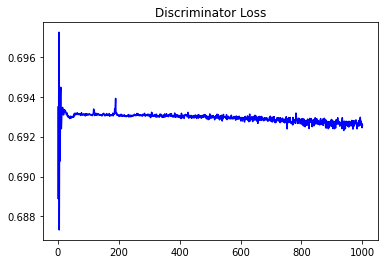

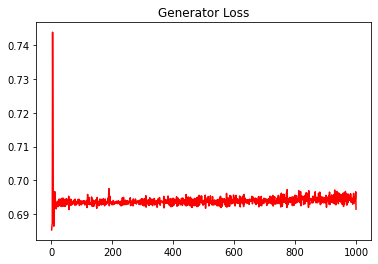

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09391210752978905


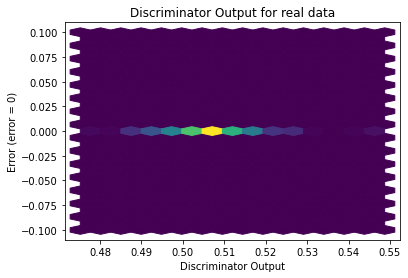

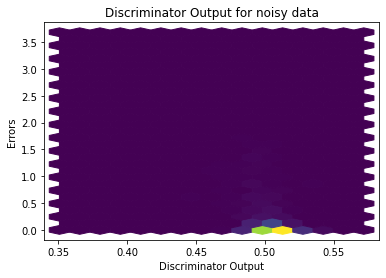

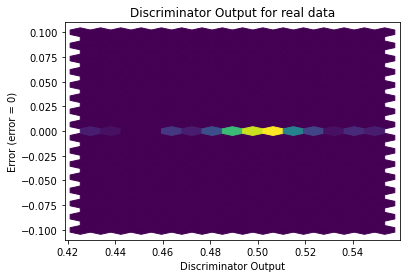

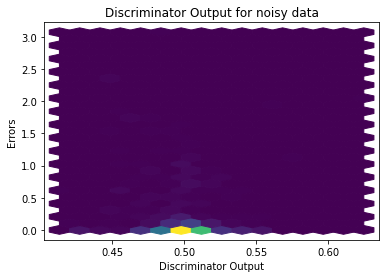

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


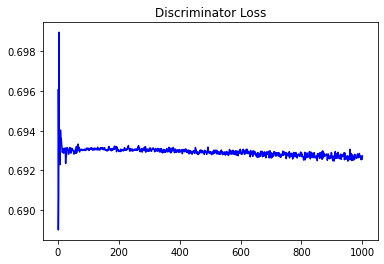

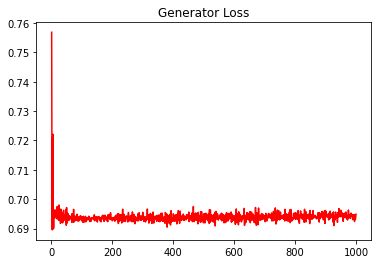

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0854901117526008


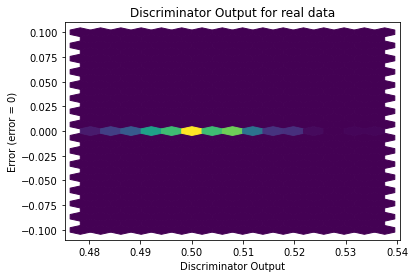

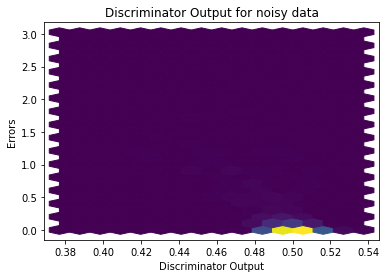

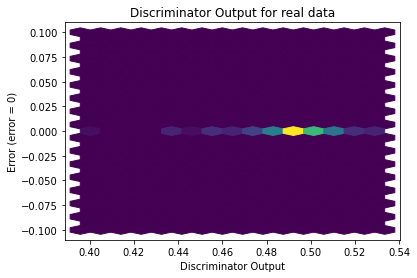

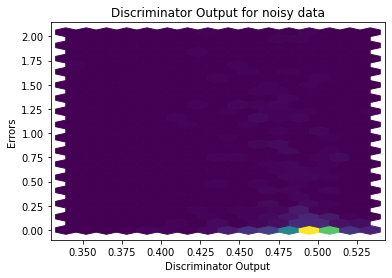

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7391]], requires_grad=True)
